<a href="https://colab.research.google.com/github/Harshavalmiki/258-Deep-learning/blob/main/A5_Part3__Pytorch_with_builtin_fn's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part3**- Neural Network using pytorch built in fucntions.

In [3]:
!pip install umap

!pip install umap-learn


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn


In [6]:

n = 100
d = 3

x = np.random.uniform(-1, 1, (n, d))

#Non Linear Equation

x = np.random.uniform(-1, 1, (n, 3))

weights_true = np.array([[6, 1, 1],]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true




class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


In [8]:


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)


tensor(43.7545, grad_fn=<MseLossBackward0>)


In [9]:

# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(43.7545, grad_fn=<MseLossBackward0>)
tensor(33.7427, grad_fn=<MseLossBackward0>)


In [10]:

def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()


tensor(33.7427, grad_fn=<MseLossBackward0>)
tensor(33.0631, grad_fn=<MseLossBackward0>)
tensor(32.3531, grad_fn=<MseLossBackward0>)
tensor(31.6101, grad_fn=<MseLossBackward0>)
tensor(30.8371, grad_fn=<MseLossBackward0>)
tensor(30.0334, grad_fn=<MseLossBackward0>)
tensor(29.2017, grad_fn=<MseLossBackward0>)
tensor(28.3435, grad_fn=<MseLossBackward0>)
tensor(27.4614, grad_fn=<MseLossBackward0>)
tensor(26.5557, grad_fn=<MseLossBackward0>)
tensor(25.6308, grad_fn=<MseLossBackward0>)
tensor(24.6909, grad_fn=<MseLossBackward0>)
tensor(23.7413, grad_fn=<MseLossBackward0>)
tensor(22.7872, grad_fn=<MseLossBackward0>)
tensor(21.8438, grad_fn=<MseLossBackward0>)
tensor(20.9288, grad_fn=<MseLossBackward0>)
tensor(20.0412, grad_fn=<MseLossBackward0>)
tensor(19.1865, grad_fn=<MseLossBackward0>)
tensor(18.3727, grad_fn=<MseLossBackward0>)
tensor(17.5983, grad_fn=<MseLossBackward0>)
tensor(16.8599, grad_fn=<MseLossBackward0>)
tensor(16.1549, grad_fn=<MseLossBackward0>)
tensor(15.4796, grad_fn=<MseLoss

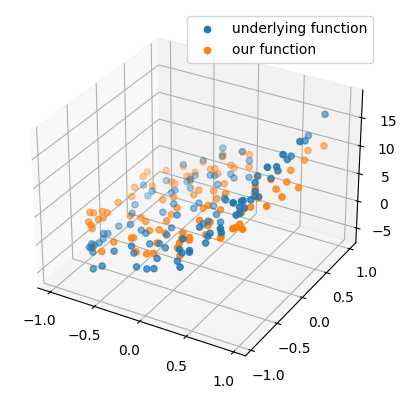

In [11]:
# Now we run the training loop
from typing import Callable

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.01, num_epochs=40)
plot_4d(x, y_true, model(x_tensor).detach())